In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# # Interactive plots
# %matplotlib notebook

# Load all packages used
import matplotlib.pyplot as plt
import numpy as np
import mypackage
import sklearn

timer = mypackage.utils.Timer()

TensorFlow version is 2.1.0


Using TensorFlow backend.


(6, 100, 100, 30) (-14.092379, 15.425261)
(array([0, 1, 2], dtype=int32), array([49821,  9311,   868]))


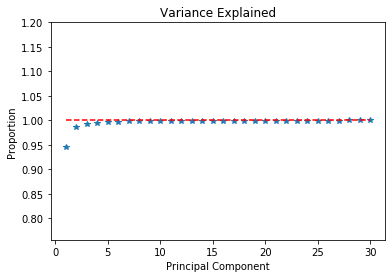

In [2]:
# Load the labeled data
dataset_folder = 'data/tomra_all'
file_list = list(np.array(mypackage.Dataset.TOMRA_FILLET_LAYERS)[[0,5,9]]) + list(np.array(mypackage.Dataset.TOMRA_OBVIOUS_PLASTICS)[[0,4,5]])

X, Y = mypackage.Dataset.load_files(file_list, dataset_folder, with_labels=True)
_, X, _ = mypackage.Dataset.scale(None, X, scaler='GlobalStandardization')
X, _ = mypackage.Dataset.PCA(X, None, n_components=30, plot=True, whiten=True)

print(X.shape, (X.min(), X.max()))
print(np.unique(Y, return_counts=True))

In [3]:
# Parameters for the SVM grid search
SVM_GRID_PARAMS = [{'kernel': ['rbf'], 'gamma': [10, 1, 1e-1, 1e-2, 1e-3],
                                       'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]},
                   {'kernel': ['linear'], 'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}]

data = mypackage.StackTransform(X, Y)

print("Running a grid search SVM")
print(SVM_GRID_PARAMS)
X_train, y_train = data.X_stack(), data.Y_stack().ravel()

clf_svm = sklearn.svm.SVC()
clf_svm = sklearn.model_selection.GridSearchCV(clf_svm, SVM_GRID_PARAMS, verbose=5, n_jobs=-1)
clf_svm.fit(X_train, y_train)
print("SVM best parameters : {}".format(clf_svm.best_params_))

Running a grid search SVM
[{'kernel': ['rbf'], 'gamma': [10, 1, 0.1, 0.01, 0.001], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.6min
/.local/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 163.0min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 275.5min finished


SVM best parameters : {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [4]:
# clf_svm.cv_results_

In [5]:
# Parameters for the SVM grid search
LR_GRID_PARAMS = {"C": [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], "penalty":["l1","l2"]} # l1 lasso l2 ridge

data = mypackage.StackTransform(X, Y)

print("Running a grid search Logistic Regression")
print(LR_GRID_PARAMS)
X_train, y_train = data.X_stack(), data.Y_stack().ravel()

clf_lr = sklearn.linear_model.LogisticRegression(max_iter=1000, solver='saga', multi_class='ovr', verbose=0, n_jobs=-1)
clf_lr = sklearn.model_selection.GridSearchCV(clf_lr, LR_GRID_PARAMS, verbose=5, n_jobs=-1)
clf_lr.fit(X_train, y_train)
print("Logistic Regression best parameters : {}".format(clf_lr.best_params_))

Running a grid search Logistic Regression
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   56.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   56.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 10 epochs took 0 seconds
convergence after 33 epochs took 1 seconds
convergence after 38 epochs took 2 seconds
Logistic Regression best parameters : {'C': 0.1, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished


### It might be interesting to show the heatmap of RBF accuracy obtained

In [6]:
clf_svm.cv_results_

{'mean_fit_time': array([ 188.58418164,   79.04204125,   86.06752558,   93.68079834,
          95.63292565,  670.38691678,  610.92273064,  110.77756481,
          45.86577387,   94.53004255,  960.03933449,  920.18308687,
         115.31686625,   14.62124472,   33.26827774, 1390.8932394 ,
        1302.29511652,  204.1659584 ,    7.62298274,   10.94319129,
        2109.4810904 , 2033.09094081,  217.87885585,    6.89106879,
           6.47244825, 2104.79581771, 2034.94575973,  216.4799222 ,
           8.93053937,    6.21865158, 2108.92690845, 2043.88675699,
         217.74298921,    9.74185095,   12.99438744,   10.8636538 ,
           5.49012194,    4.75327473,    9.53767734,   49.74023528,
         405.91623216, 2748.27704453]),
 'std_fit_time': array([1.13403716e+00, 2.19903997e-01, 1.18318063e+00, 8.32268574e-01,
        3.74128321e+00, 1.38843854e+00, 2.83225683e+00, 5.62295236e-01,
        9.78683190e-01, 2.96295499e+00, 1.19956797e+00, 2.60144921e+00,
        1.67838685e+00, 9.52431

In [7]:
clf_lr.cv_results_

{'mean_fit_time': array([ 1.39116921,  1.5868535 ,  2.27899585,  2.81346097,  4.72483706,
         9.05581937,  6.18235254, 18.65513554,  6.13328156,  5.43622446,
         6.6425993 ,  5.57245517,  6.85034914,  4.69108224]),
 'std_fit_time': array([ 0.25704401,  0.07951417,  0.230432  ,  0.42378861,  0.57618801,
         2.3509355 ,  0.98677453, 11.08830451,  0.66880044,  1.17765014,
         1.25102123,  0.98600977,  1.22011371,  1.13580057]),
 'mean_score_time': array([0.00207043, 0.00198793, 0.00195651, 0.00196776, 0.001934  ,
        0.00197015, 0.00196166, 0.00195589, 0.00194001, 0.00196681,
        0.00206852, 0.00210557, 0.00206623, 0.00157838]),
 'std_score_time': array([2.34226810e-04, 4.84624690e-05, 3.21988329e-05, 4.46602231e-05,
        3.05020770e-05, 1.49552128e-05, 2.24374051e-05, 3.28296756e-05,
        1.00101738e-05, 2.26683791e-05, 1.82461101e-05, 5.35608492e-05,
        4.81191306e-05, 3.03263199e-04]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 

## See the SVM_LR_SummaryOfParameterSearch.ipynb script for the results

In [8]:
clf_svm.cv_results_['mean_test_score']

array([0.83035   , 0.83035   , 0.83035   , 0.83035   , 0.83035   ,
       0.83035   , 0.83035   , 0.8312    , 0.97463333, 0.86138333,
       0.83035   , 0.83035   , 0.96936667, 0.98451667, 0.9806    ,
       0.83035   , 0.83035   , 0.97256667, 0.98603333, 0.98538333,
       0.83035   , 0.83035   , 0.9728    , 0.98495   , 0.98638333,
       0.83035   , 0.83035   , 0.9728    , 0.98178333, 0.98685   ,
       0.83035   , 0.83035   , 0.9728    , 0.97995   , 0.98448333,
       0.98458333, 0.98578333, 0.98628333, 0.98666667, 0.98661667,
       0.98651667, 0.98655   ])